#回帰木（特徴量：ALL、max_depth=4）の学習→予測→評価

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.1
# !pip install scikit-learn==1.2.2

In [ ]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
0.20.1
1.2.2


In [ ]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

In [ ]:
# 特徴量と目的変数の設定
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [ ]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [ ]:
 # モデルの学習
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='squared_error', max_depth=4, min_samples_leaf=10, ccp_alpha=5, random_state=0)  # 深さ4の回帰木モデル
model.fit(X_train, y_train)
model.get_params()

{'ccp_alpha': 5,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test)
print('RMSE test: %.2f' % (mean_squared_error(y_test, y_test_pred) ** 0.5))

RMSE test: 5.95


In [ ]:
# 予測値
model.predict(X_test)

array([28.55043478, 21.60075758, 21.60075758, 14.45338346, 21.60075758,
       21.60075758, 21.60075758, 21.60075758, 21.60075758, 21.60075758,
       14.45338346, 14.45338346, 14.45338346, 14.45338346, 44.92916667,
       28.55043478, 21.60075758, 28.55043478, 28.55043478, 21.60075758,
       28.55043478, 21.60075758, 21.60075758, 28.55043478, 21.60075758,
       21.60075758, 21.60075758, 14.45338346, 44.92916667, 14.45338346,
       14.45338346, 21.60075758, 21.60075758, 21.60075758, 21.60075758,
       21.60075758, 14.45338346, 21.60075758, 14.45338346, 14.45338346,
       21.60075758, 21.60075758, 21.60075758, 14.45338346, 21.60075758,
       21.60075758, 14.45338346, 14.45338346, 14.45338346, 21.60075758,
       14.45338346, 14.45338346, 21.60075758, 44.92916667, 14.45338346,
       14.45338346, 21.60075758, 21.60075758, 21.60075758, 14.45338346,
       28.55043478, 21.60075758, 28.55043478, 28.55043478, 21.60075758,
       28.55043478, 14.45338346, 14.45338346, 14.45338346, 21.60

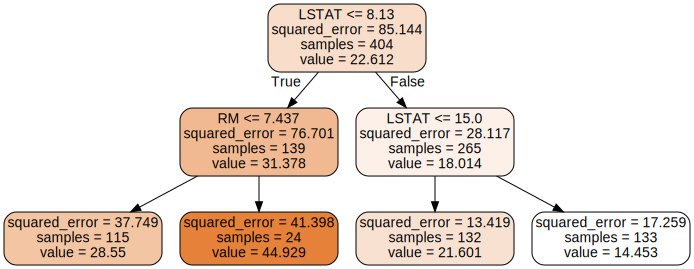

In [ ]:
# 木の可視化
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None, rounded=True, feature_names=X.columns, filled=True)
graphviz.Source(dot_data, format='png')

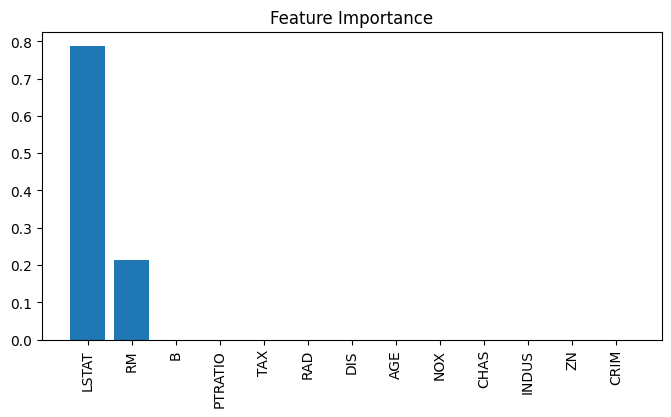

In [ ]:
# 特徴量の重要度の可視化
importances = model.feature_importances_ # 特徴量の重要度
indices = np.argsort(importances)[::-1] # 特徴量の重要度を降順にソート

plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title('Feature Importance') # プロットのタイトルを作成
plt.bar(range(len(indices)), importances[indices]) # 棒グラフを追加
plt.xticks(range(len(indices)), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加
plt.show() # プロットを表示